In [1]:
# This notebook computes and plots the results for Figure 2 of the paper

import matplotlib.pyplot as plt
import numpy as np
from expected_cost import ec, utils
from expected_cost.data import get_llks_for_multi_classif_task
from scipy.stats import norm

outdir = "outputs/"
utils.mkdir_p(outdir)

In [2]:
# Parameters for the simulated data

N = 100000       # total number of samples
P0 = 0.8        # Prior for class 0

P1 = 1-P0
N0 = int(N*P0)
N1 = N - N0


c21 = 1.00: best_thr_for_f1  = -0.00, best_thr_for_ec1 = -0, best_thr_for_ec2 = -0.60
c21 = 1.82: best_thr_for_f1  = -0.60, best_thr_for_ec1 =  0, best_thr_for_ec2 = -0.70


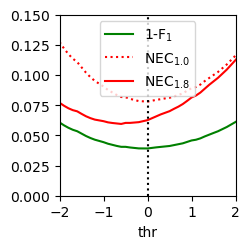

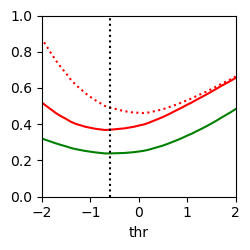

In [4]:
c1 = 1.0
c2 = 1.8
costm1 = ec.CostMatrix([[0, 1], [c1, 0]])
costm2 = ec.CostMatrix([[0, 1], [c2, 0]])


for i, var in enumerate([0.06, 0.20]):

    targets, _, llks = get_llks_for_multi_classif_task('gaussian_sim', priors=[P0,P1], sim_params={'feat_var': var}, N=N)
    logpost = utils.llks_to_logpost(llks, [P0, P1])
    scores = logpost[:,1]-logpost[:,0]  

    F1Ss, EC1s, EC2s, MCCs = [], [], [], []

    thrs = np.arange(-11,8.01,0.1)      

    for thr in thrs:

        decisions = np.array(scores > thr, dtype=int) 

        conf = ec.generalized_confusion_matrix(targets, decisions, num_targets=2, num_decisions=2)
        N10 = conf[1,0]
        N01 = conf[0,1]
        F1Ss.append(utils.Fscore(N10, N01, N0, N1))
        MCCs.append(utils.MCCoeff(N10, N01, N0, N1))
        EC1s.append(ec.average_cost( targets, decisions, costm1, adjusted=True))        
        EC2s.append(ec.average_cost( targets, decisions, costm2, adjusted=True))        


    # Find the threshold at which F1 is minimized and define an EC that is minimized at the same threshold
    best_thr_for_f1 = thrs[np.argmax(F1Ss)]
    best_thr_for_ec1 = thrs[np.argmin(EC1s)]
    best_thr_for_ec2 = thrs[np.argmin(EC2s)]

    # Equivalent cost
    c = np.exp(-best_thr_for_f1)
    bayes_thr_for_ec1 = np.log(1/c1)
    bayes_thr_for_ec2 = np.log(1/c2)

    print("c21 = %.2f: best_thr_for_f1  = %.2f, best_thr_for_ec1 = %2.f, best_thr_for_ec2 = %.2f"%(c, best_thr_for_f1, best_thr_for_ec1, best_thr_for_ec2))

    plt.figure(figsize=(2.6,2.6))
    plt.plot(thrs, 1-np.array(F1Ss), 'g-', label=r'1-$\mathrm{F}_{1}$') 
    plt.plot(thrs, np.array(EC1s), 'r:', label=r'$\mathrm{NEC}_{%.1f}$'%c1) 
    plt.plot(thrs, np.array(EC2s), 'r-', label=r'$\mathrm{NEC}_{%.1f}$'%c2) 
    plt.xlim(-2,2)
    plt.ylim(0, 1.0 if i>0 else 0.15)
    plt.plot([best_thr_for_f1, best_thr_for_f1],plt.ylim(), 'k:')

    if i==0:
        plt.legend()
    plt.xlabel('thr')
    plt.tight_layout()
    plt.savefig(outdir+"/nec_vs_f1_%.2f.pdf"%std)
